In [1]:
import os
import glob
import librosa
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import matplotlib
import librosa
import librosa.display
import numpy as np
import IPython
import warnings
from scipy import signal

warnings.filterwarnings("ignore")

In [2]:
DATA_SET = "train"
ROOT_FOLDER = "/Users/test/Documents/Projects/Master/nips4bplus/raw_audio"
#AUDIO_PATHS = os.path.join(ROOT_FOLDER, DATA_SET,"/*.wav")
AUDIO_PATHS = f"{ROOT_FOLDER}/{DATA_SET}/*.wav"
AUDIO_PATHS, len(glob.glob(AUDIO_PATHS))
ANNOTATIONS_PATH = f"{ROOT_FOLDER}/annotations/*.csv"
SR = 44100
AUDIO_PATHS

'/Users/test/Documents/Projects/Master/nips4bplus/raw_audio/train/*.wav'

In [3]:
def load_annotation(annotation_file):
    outs = []
    if os.path.isfile(annotation_file) is False:
        return []
    with open(annotation_file, 'r') as fs:
        try:
            data = fs.read().splitlines()
            for row in data:
                if not row:
                    continue
                start_t, duration, classname = row.split(',')
                start_t, duration = float(start_t), float(duration)
                if duration < 0.25:
                    continue
                outs.append([start_t, duration, classname])
        except Exception as e:
            print(e, "Error while processing", annotation_file, print(data))
            return []
    return outs

def play_audio(y, sr):
    return IPython.display.display(IPython.display.Audio(y, rate=sr))

def f_high(y,sr):
    b,a = signal.butter(10, 2000/(sr/2), btype='highpass')
    yf = signal.lfilter(b,a,y)
    return yf

def compute_spectrogram(y, sr):
    D = librosa.stft(y)
    D = librosa.amplitude_to_db(D, ref=np.max)
    return D

def compute_mel_spectrogram(y, sr):
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=64)
    D = librosa.power_to_db(S, ref=np.max) 
    return D

[]
[[0.007256236, 1.719727891, 'Siteur_song']]
1


[[0.005079365, 4.998820862, 'Plasab_song'], [1.645714286, 0.345396825, 'Galcri_call']]
2


[[0.006530612, 1.495510204, 'Serser_song'], [2.860408163, 1.795918367, 'Serser_song']]
2


[]
[[0.87755102, 0.318367347, 'Cerbra_call'], [1.734693878, 0.269387755, 'Cerbra_call']]
2


[]
[]
[]
[[0.0, 1.038367347, 'Unknown'], [1.613061224, 0.992653061, 'Unknown'], [2.736326531, 0.933877551, 'Turmer_song'], [3.833469388, 0.894693878, 'Gargla_call']]
4


[[0.259183673, 0.287755102, 'Cetcet_song'], [1.130612245, 0.375510204, 'Cetcet_song'], [1.512244898, 0.487755102, 'Cetcet_song'], [2.053061224, 0.263265306, 'Oriori_song']]
4


[]
[]
[]
[]
[]
[]
[]
[[2.292244898, 0.276462585, 'Petpet_call'], [2.971428571, 0.424489796, 'Sylcan_song']]
2


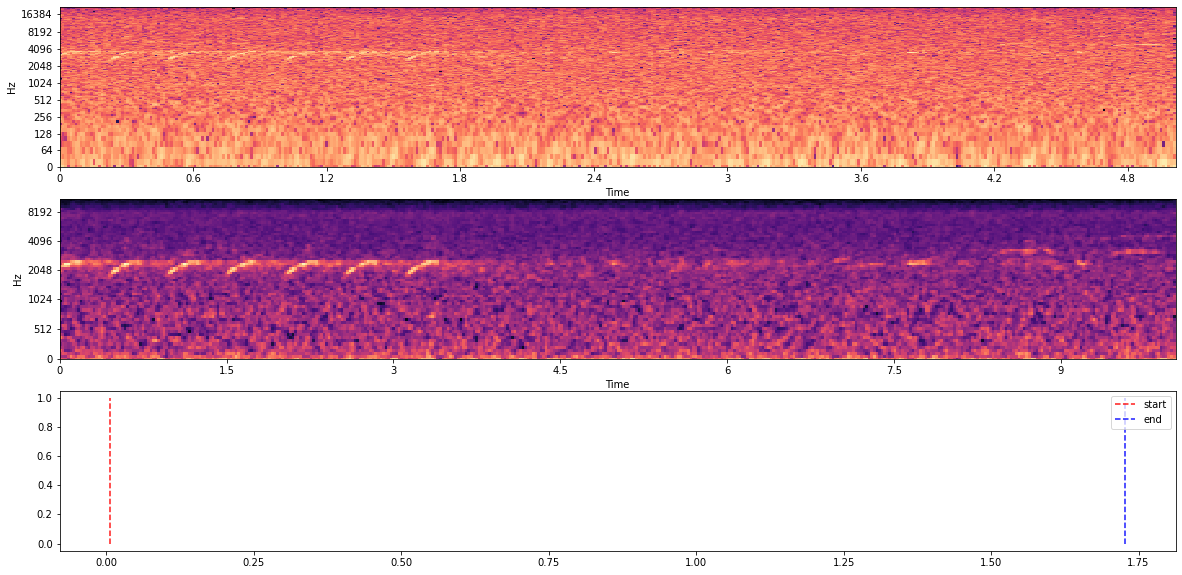

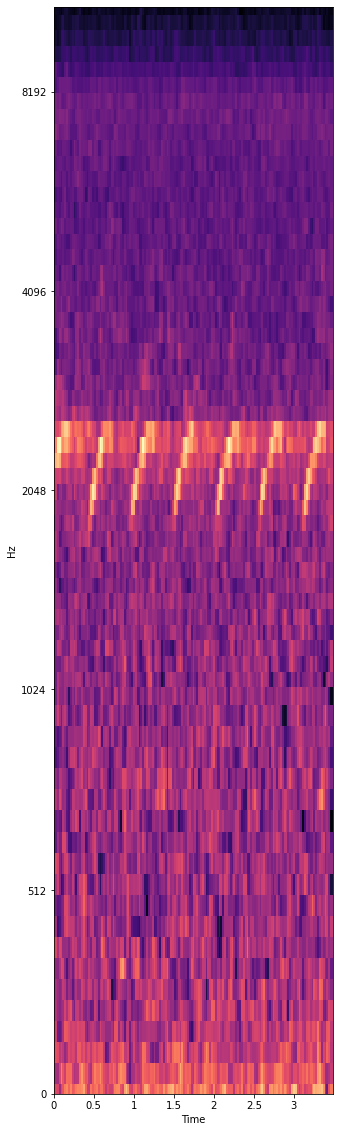

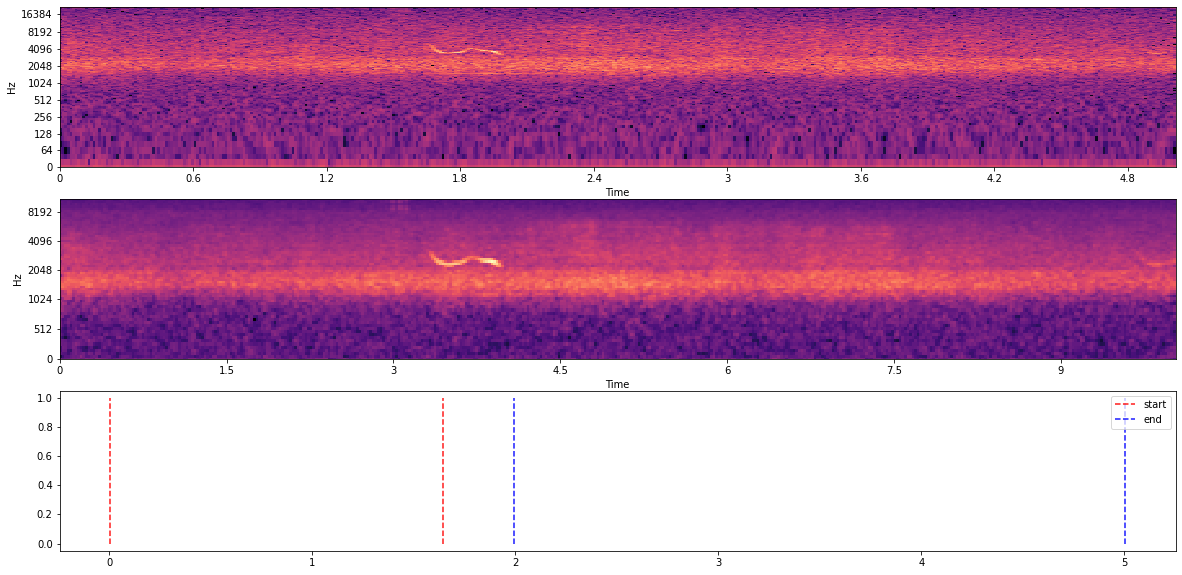

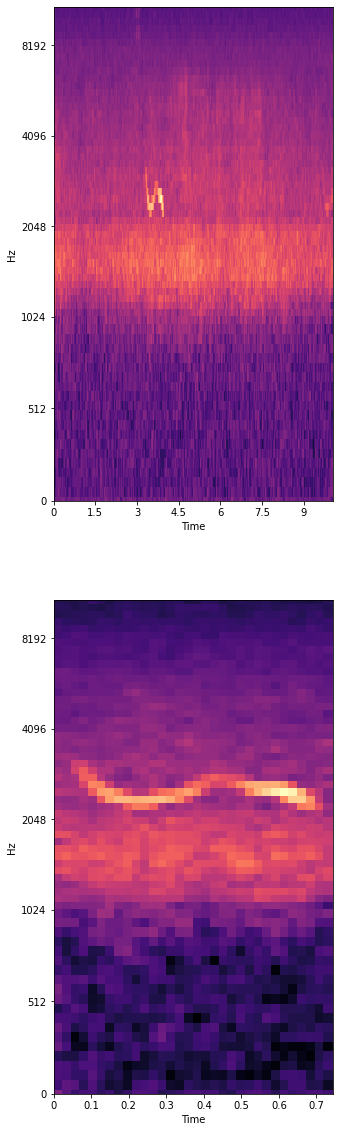

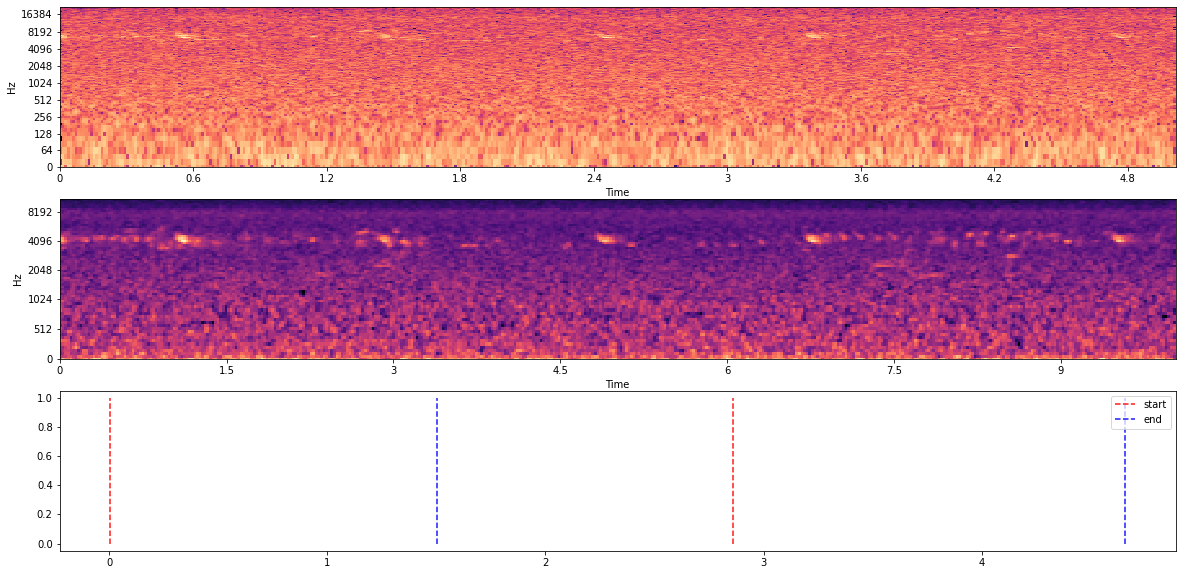

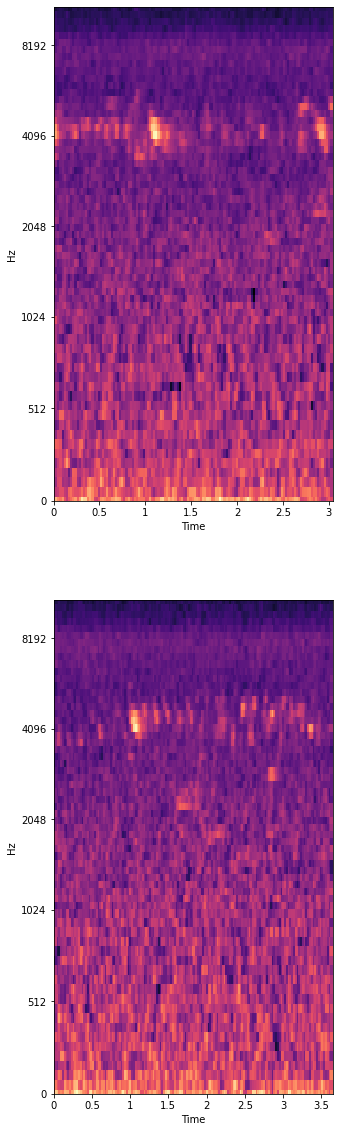

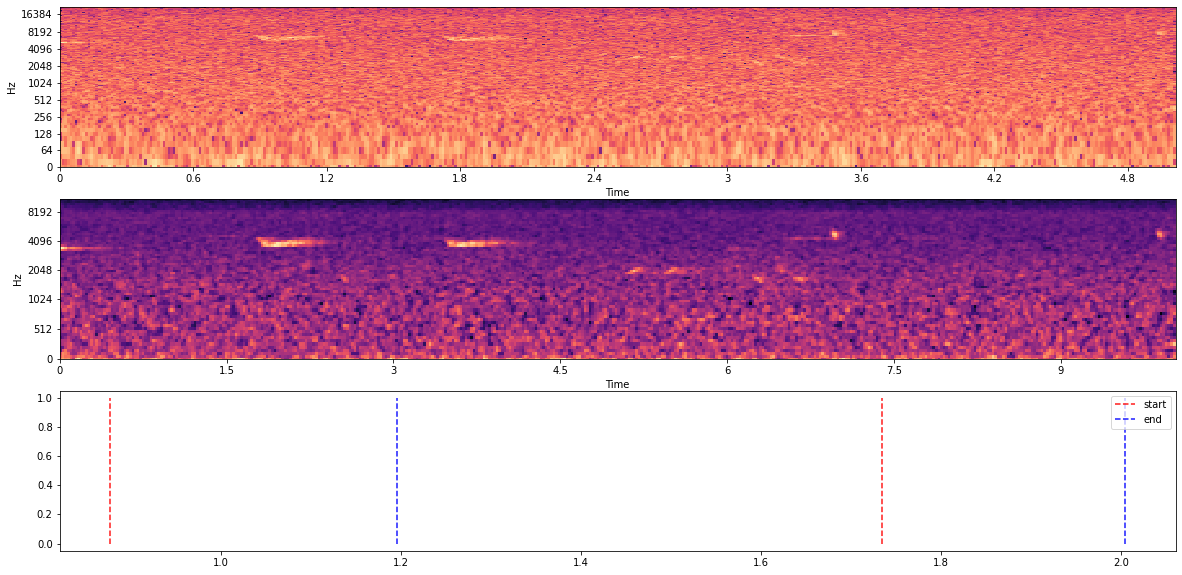

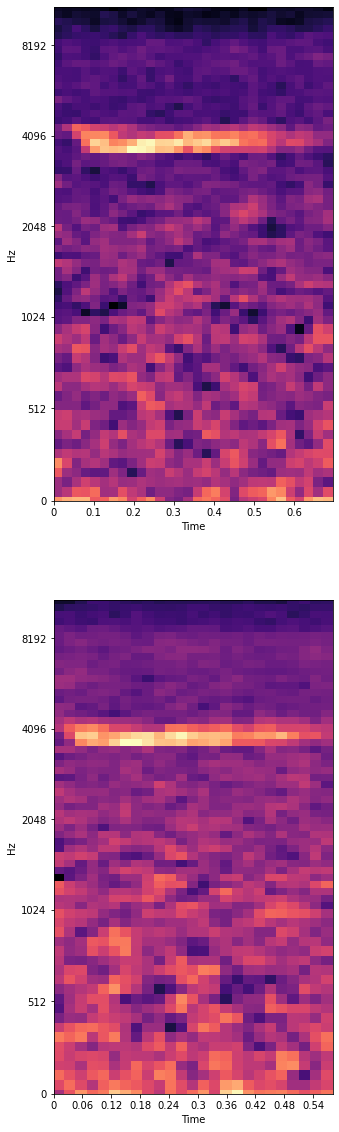

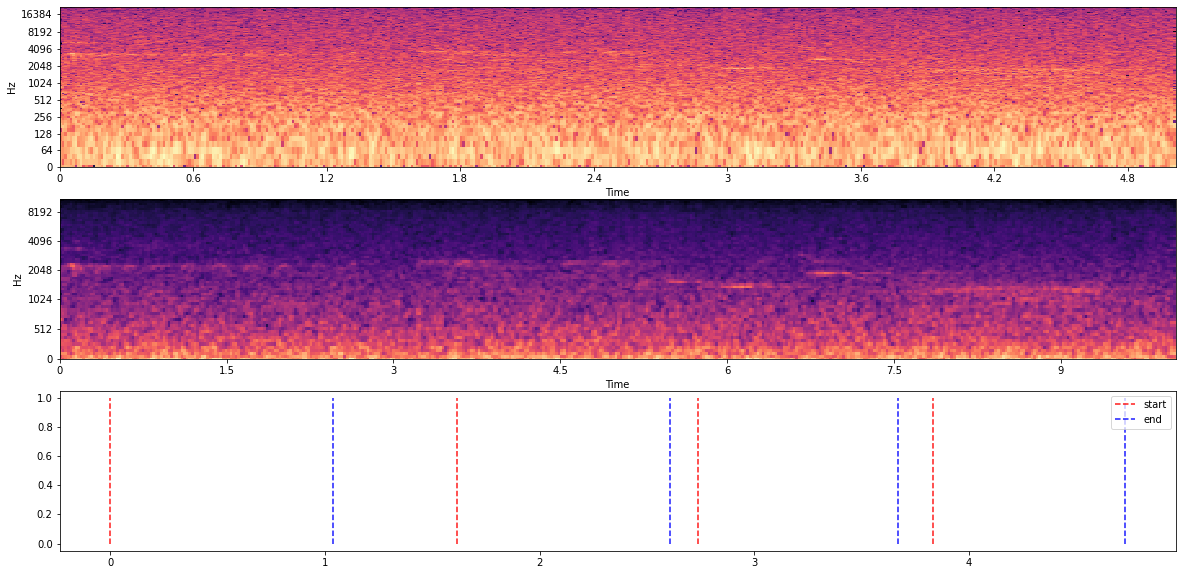

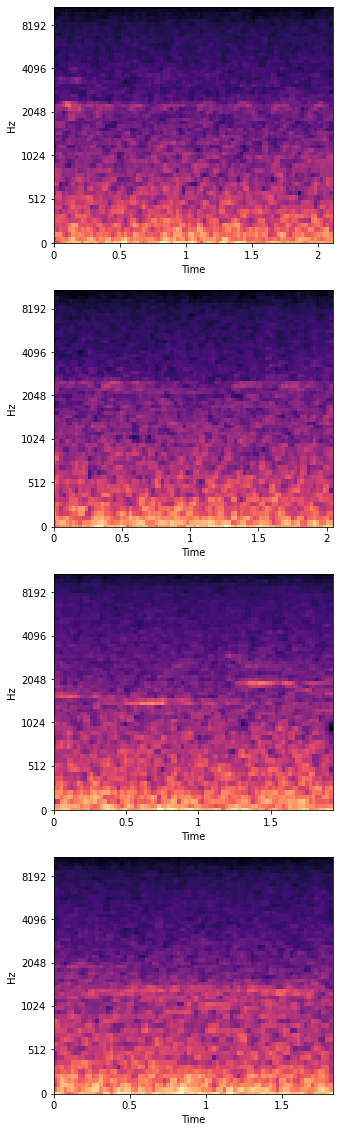

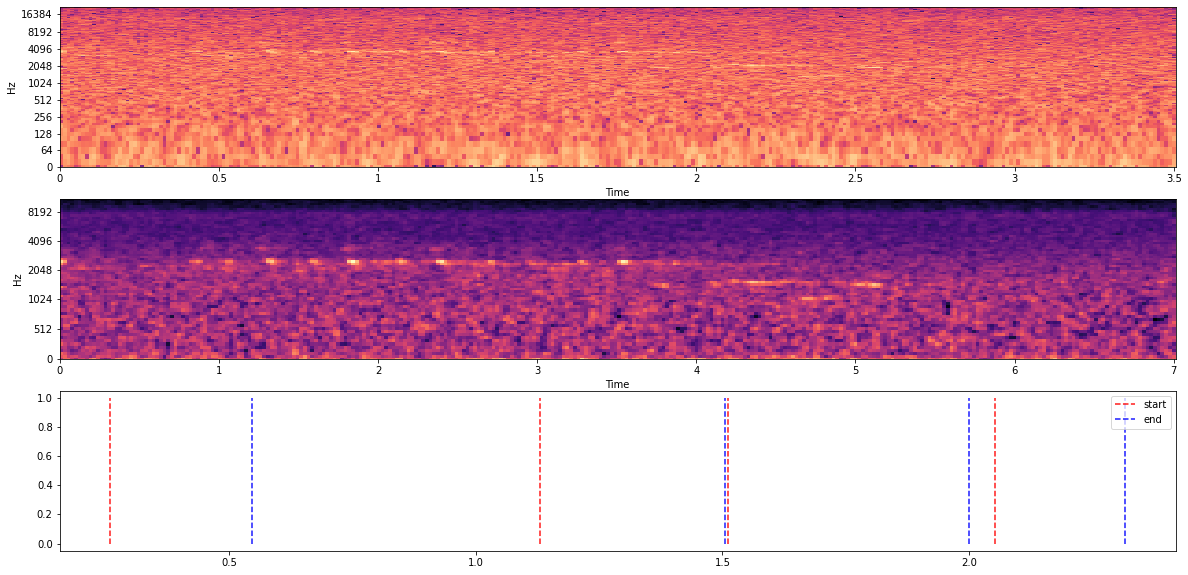

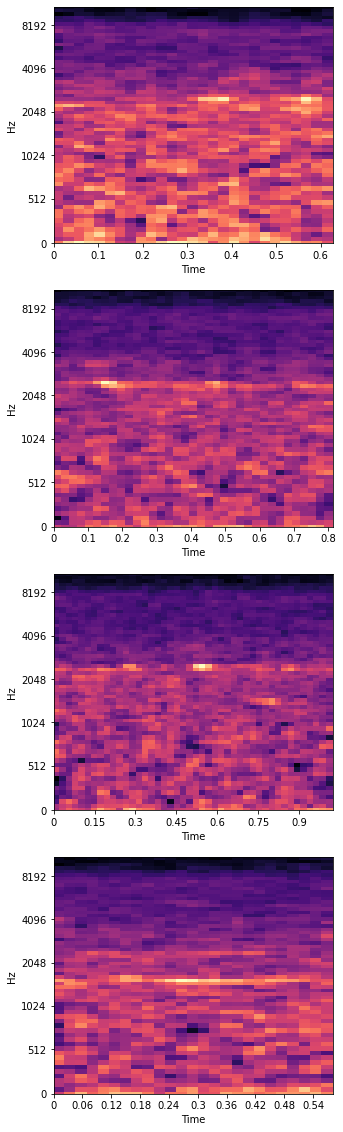

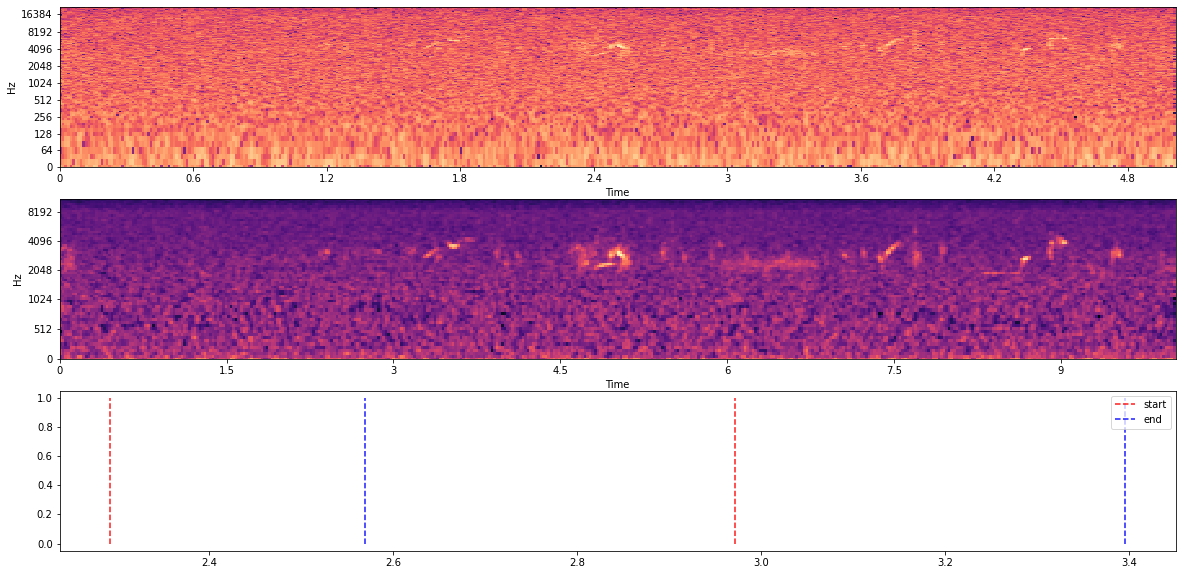

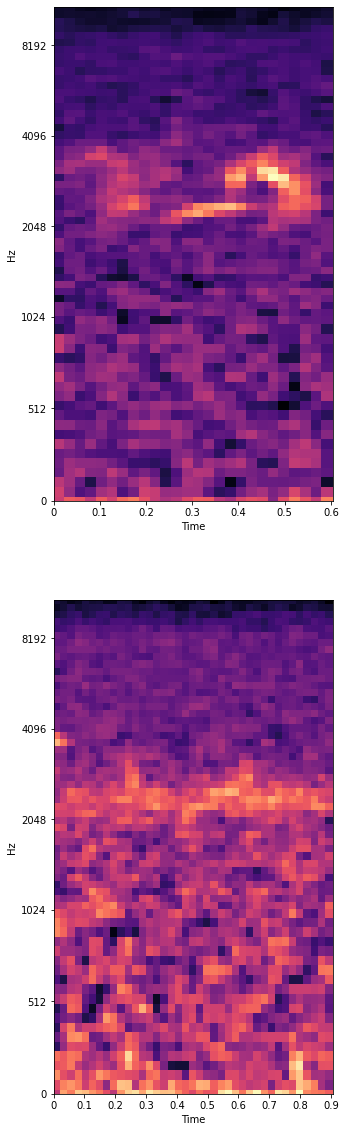

In [6]:
for i, audio_path in tqdm(enumerate(glob.glob(AUDIO_PATHS))):
#     if i != 1:
#         continue
    y, sr = librosa.load(audio_path, sr=SR)
#     y, _ = librosa.effects.trim(y)
    assert sr == SR
    #Load all annotations. Pick a color per class, Show the annotations timestamples on the waveform. Extract the crop
    name_token = audio_path.split('_')[-1].replace("trainfile", "train")
    annotation_file = f"annotation_{name_token}".replace(".wav", ".csv") 
    annotation_file = os.path.join(ROOT_FOLDER, "annotations", annotation_file)
    annotations = load_annotation(annotation_file)
    print(annotations)
    if len(annotations) == 0:
        continue

    fig_, ax_ = plt.subplots(nrows=3, figsize=(20,10))
    spectrogram = compute_spectrogram(y, SR)
    librosa.display.specshow(spectrogram, x_axis='time', y_axis='log', sr=SR, ax=ax_[0])
    
    mel_spectrogram = compute_mel_spectrogram(y, SR)
    librosa.display.specshow(mel_spectrogram, x_axis='time', y_axis='mel', ax=ax_[1])
    
    start_times = []
    end_times = []
    print(len(annotations))
    fig, ax = plt.subplots(nrows=len(annotations), figsize=(5,20))
    if isinstance(ax, np.ndarray) is False:
        ax = [ax]
        
    for j in range(len(annotations)):
        start_times.append(annotations[j][0])
        end_times.append(annotations[j][0]+ annotations[j][1])

        start_, end_ = librosa.time_to_samples([max(0, start_times[-1]-0.01), min(end_times[-1]+0.01, len(y))], sr=SR)
        y_sample = y[start_:end_]
        mel_sample = compute_mel_spectrogram(y_sample, SR)
        librosa.display.specshow(mel_sample, x_axis='time', y_axis='mel', ax=ax[j])
        play_audio(y_sample, sr)
#             print(f"song_{i}: start:{start_times[-1]} duration:{annotations[j][1]}")
    
    ax_[-1].vlines(start_times, 0, 1, color='r', alpha=0.9, linestyle='--', label='start')
    ax_[-1].vlines(end_times, 0, 1, color='b', alpha=0.9, linestyle='--', label='end')
    ax_[-1].axis('tight')
    ax_[-1].legend(frameon=True, framealpha=0.75)

    play_audio(y, sr)
    if i > 10 :
#         print(len(y), audio_path)
        break
